<h2>Power flow of a problem in Hadi's book</h2>

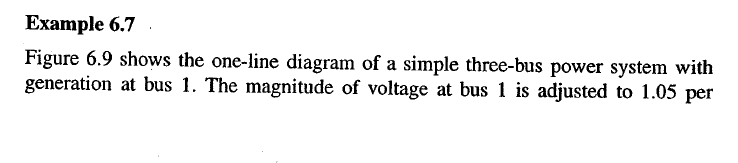

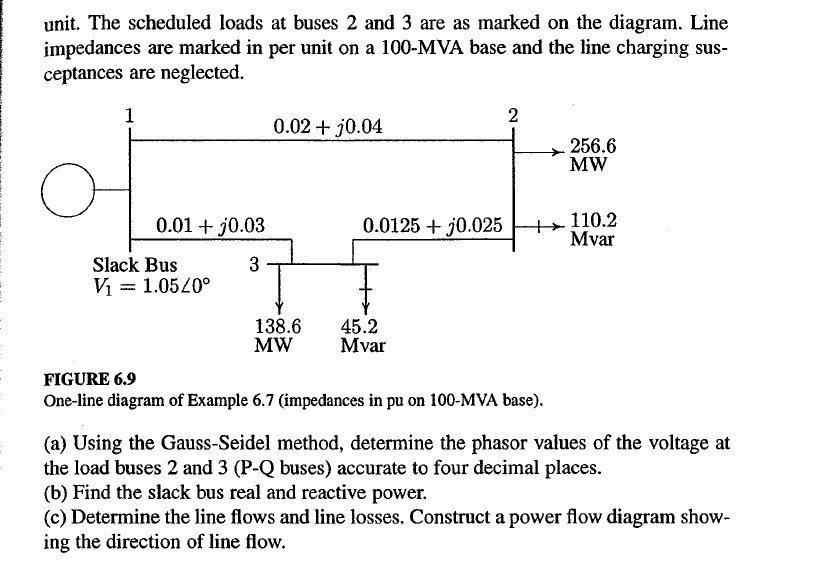

In [2]:
import pypsa
import numpy as np
import folium
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import cartopy.crs as ccrs

In [3]:
network = pypsa.Network()


# add low voltage buses
# for i in range(1,4):
#     network.add("Bus", f"Bus{i}", v_nom = 11)

network.add("Bus", "Bus1", v_nom = 11, x = 27.7061, y = 85.3148, v_mag_pu_set = 1.05)
network.add("Bus", "Bus2", v_nom = 11, x = 27.6253, y = 85.5561)
network.add("Bus", "Bus3", v_nom = 11, x = 27.6660, y = 85.3227)


network.add("Line", "Line12", bus0 = "Bus1", bus1 = "Bus2", r = 1.21*0.02, x = 1.21*0.04,
             length = 1.0)
network.add("Line", "Line13", bus0 = "Bus1", bus1 = "Bus3", r = 1.21*0.01, x = 1.21*0.03,
             length = 1.0)
network.add("Line", "Line23", bus0 = "Bus2", bus1 = "Bus3", r = 1.21*0.0125, x = 1.21*0.025,
             length = 1.0)


# add loads to low voltage buses
network.add("Load", "Load02", bus = "Bus2", p_set = 256.6, q_set = 110.2)
network.add("Load", "Load03", bus = "Bus3", p_set = 138.6, q_set = 45.2)

# connect an external grid to HVB - Generator modelled as an external grid
network.add("Generator", "G1", bus = "Bus1", control = "Slack" )



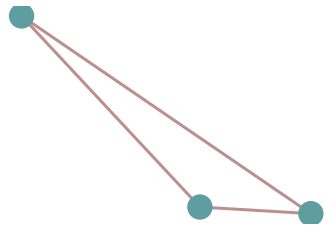

In [4]:
network.plot(bus_sizes=9e-5, 
             projection=ccrs.EqualEarth(), 
             color_geomap=False,
             line_widths=3.0,
            )
plt.show()

In [5]:
# Step 1: Get the geographic coordinates of your buses
bus_coordinates = {
    'bus1': (85.3148, 27.7061),
    'bus2': (85.5561, 27.6253),
    'bus3': (85.3227, 27.6660)
}

# Step 2: Create a Folium map centered around the coordinates of your buses
map_center = np.mean(list(bus_coordinates.values()), axis=0)
m = folium.Map(location=map_center, zoom_start=10)

# Step 3: Plot the buses on the map
for bus, coords in bus_coordinates.items():
    folium.Marker(location=coords, popup=bus).add_to(m)

# Step 4: Overlay the network plot on top of the Folium map

# Define the bounds of the network plot based on the bus coordinates
min_latitude = min(coord[0] for coord in bus_coordinates.values())
max_latitude = max(coord[0] for coord in bus_coordinates.values())
min_longitude = min(coord[1] for coord in bus_coordinates.values())
max_longitude = max(coord[1] for coord in bus_coordinates.values())
# Assuming you have already created your network and stored it in variable 'network'
# and plotted it using network.plot(), you can save the plot as a PNG image
# and then overlay it on the Folium map
plt.savefig('network_plot.png')
folium.raster_layers.ImageOverlay(
    name='Network Plot',
    image='network_plot.png',
    bounds=[[min_latitude, min_longitude], [max_latitude, max_longitude]],
    opacity=0.7,
    interactive=True,
    cross_origin=False,
    zindex=1,
).add_to(m)

# Save the map as an HTML file
m.save('map_with_network.html')


<Figure size 432x288 with 0 Axes>

In [6]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,
Line12,Bus1,Bus2,,0.04840,0.024200,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line13,Bus1,Bus3,,0.03630,0.012100,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Line23,Bus2,Bus3,,0.03025,0.015125,0.0,0.0,0.0,0.0,False,...,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
def set_line_colors(p0: float) -> str:
    if abs(p0) < 100:
        return "g"
    else:
        return "r"

In [8]:
network.pf()

# network.plot()
# plt.show()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 3 iterations with error of 0.000000 in 0.038541 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         3,
 'error': SubNetwork             0
 snapshot                
 now         1.494784e-07,
 'converged': SubNetwork     0
 snapshot        
 now         True}

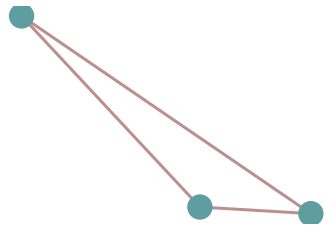

In [9]:
network.plot(bus_sizes=9e-5, projection=ccrs.EqualEarth(), color_geomap=False,
             line_widths=3.0,
            )
plt.show()

In [10]:
network.lines_t.p0

,Line12,Line13,Line23
snapshot,,,
now,199.5,210.0,-65.6


In [11]:
network.lines_t.q0

,Line12,Line13,Line23
snapshot,,,
now,84.0,105.0,-43.2


In [12]:
network.buses_t.v_mag_pu

Bus,Bus1,Bus2,Bus3
snapshot,,,
now,1.05,0.981835,1.001249


In [13]:
help(network.plot)

Help on method plot in module pypsa.plot:

plot(margin=0.05, ax=None, geomap=True, projection=None, bus_colors='cadetblue', bus_alpha=1, bus_sizes=0.02, bus_cmap=None, bus_norm=None, bus_split_circles=False, line_colors='rosybrown', link_colors='darkseagreen', transformer_colors='orange', line_alpha=1, link_alpha=1, transformer_alpha=1, line_widths=1.5, link_widths=1.5, transformer_widths=1.5, line_cmap=None, link_cmap=None, transformer_cmap=None, line_norm=None, link_norm=None, transformer_norm=None, flow=None, branch_components=None, layouter=None, title='', boundaries=None, geometry=False, jitter=None, color_geomap=None) method of pypsa.components.Network instance
    Plot the network buses and lines using matplotlib and cartopy.
    
    Parameters
    ----------
    margin : float, defaults to 0.05
        Margin at the sides as proportion of distance between max/min x, y
        Will be ignored if boundaries are given.
    ax : matplotlib ax, defaults to plt.gca()
        Axis to

In [14]:
line_colors = abs(network.lines_t.p0.loc['now'])
collection = network.plot(bus_sizes=9e-5, projection=ccrs.EqualEarth(), color_geomap=False,
             line_widths=3.0, line_colors = line_colors, line_cmap = plt.cm.coolwarm,
            bus_colors = "green",
            )
plt.colorbar(collection[1], label = "line loading", fraction = 0.035)
plt.show()

ValueError: Data array shape, (256,) is incompatible with alpha array shape, (3,). This can occur with the deprecated behavior of the "flat" shading option, in which a row and/or column of the data array is dropped.

<Figure size 432x288 with 2 Axes>

In [15]:
network.lines_t.p0

,Line12,Line13,Line23
snapshot,,,
now,199.5,210.0,-65.6


In [16]:
print(collection)

(<matplotlib.collections.PatchCollection object at 0x000001FFA39FD970>, <matplotlib.collections.LineCollection object at 0x000001FFA3A052E0>)


In [17]:
type(collection)

tuple

In [18]:
len(collection)

2

In [19]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Load02,Bus2,,,256.6,110.2,-1.0
Load03,Bus3,,,138.6,45.2,-1.0


In [20]:
network.loads.loc['Load02', 'p_set'] = 260.0

In [21]:
network.loads

attribute,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
Load02,Bus2,,,260.0,110.2,-1.0
Load03,Bus3,,,138.6,45.2,-1.0


In [22]:
network.loads.loc['Load5', 'p_set'] = 260.0
network.loads.loc['Load6', 'p_set'] = 260.0
network.loads.loc['Load02', 'p_set'] = 260.0
network.loads.loc['Load02', 'p_set'] = 260.0

In [23]:
network.lines

attribute,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,...,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt,v_nom
Line,,,,,,,,,,,,,,,,,,,,,
Line12,Bus1,Bus2,,0.04840,0.024200,0.0,0.0,0.0,0.0,False,...,inf,0,0.00040,0.000200,0.0,0.0,0.00040,0.000200,0.0,11.0
Line13,Bus1,Bus3,,0.03630,0.012100,0.0,0.0,0.0,0.0,False,...,inf,0,0.00030,0.000100,0.0,0.0,0.00030,0.000100,0.0,11.0
Line23,Bus2,Bus3,,0.03025,0.015125,0.0,0.0,0.0,0.0,False,...,inf,0,0.00025,0.000125,0.0,0.0,0.00025,0.000125,0.0,11.0


In [44]:
network.lines.loc['Line12', 'bus0']

'Bus1'

<h2>Plotting with Folium</h2>

In [46]:
import folium

# create a map object
map = folium.Map(location=(27.62075284688465, 85.53953556295654), zoom_start=10)

# get coordinates of all the buses in the network
bus_coords = []
for index, row in network.buses.iterrows():
    bus_coords.append([row['x'], row['y']])

# add circles to the locations of buses in the map
for i in range(len(bus_coords)):
    folium.Circle(location=bus_coords[i], radius=500, 
                  stroke=False,
                 fill=True, fill_color='blue', fill_opacity=0.8).add_to(map)
    

# add buses with the lines
for index, row in network.lines.iterrows():
    bus0 = row['bus0']
    bus1 = row['bus1']
    folium.PolyLine(locations=[(network.buses.loc[bus0].x, network.buses.loc[bus0].y), 
                              (network.buses.loc[bus1].x, network.buses.loc[bus1].y)]).add_to(map)


In [52]:
map.save('Hadi.html')
map

In [1]:
import pypsa

In [2]:
pypsa.Network.plot()

<module 'pypsa.clustering' from 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\pypsa\\clustering\\__init__.py'>